In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from __future__ import print_function
from scipy import interpolate, signal
from time import *
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal.cross_correlation import xcorr_pick_correction
from obspy.signal.filter import lowpass
from matplotlib.mlab import detrend
from obspy.signal.invsim import cosine_taper 
from wf_fft import wf_fft
from smooth import smooth
import numpy as np
import matplotlib.pylab as plt
import os
import glob
import wave
import struct
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['lines.linewidth'] = 1

# Adaptation of CAN_bp.m by Carl Tape
# Coding by: Yongki Aiman, Tomy Gunawan, Angel Ling
# Bandpass filtering the vertical seismogram

# smooth is a homebrewed function
# It MUST be in your working directory

# Run this cell before the beginning of each session

In [2]:
# Getting the waveforms

client = Client("IRIS")
t = UTCDateTime("2004-12-26T00:52:23.900")
starttime = UTCDateTime("2004-12-26T00:48:25.600")
endtime = t+(2*3600) # 2 hrs after the earthquake

st = client.get_waveforms("G", "CAN", "*", "BHZ", starttime, endtime, attach_response=True)
print(st)

1 Trace(s) in Stream:
G.CAN..BHZ | 2004-12-26T00:48:25.644000Z - 2004-12-26T02:52:23.844000Z | 20.0 Hz, 148765 samples


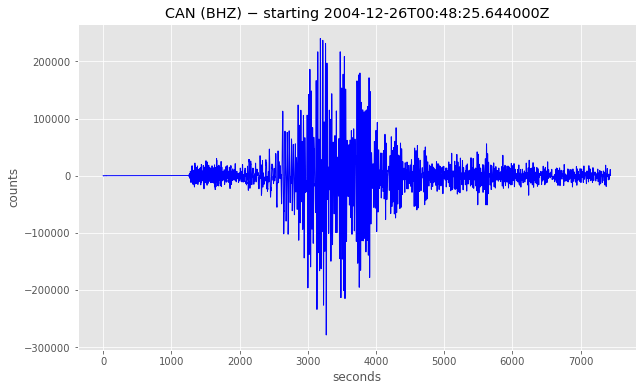

In [3]:
can = st.copy()
tr = can[0].data
df = can[0].stats.sampling_rate
times = can[0].times()

title = 'CAN (BHZ) − starting '+ str(can[0].stats['starttime'])

plt.plot(times,tr, c='b')
plt.xlabel('seconds')
plt.ylabel('counts')
plt.title(title)
plt.show();

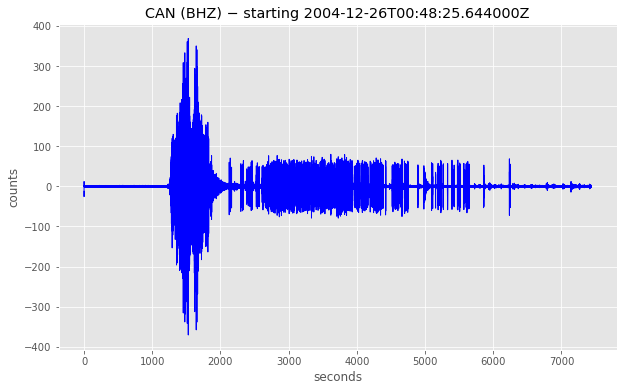

In [5]:
# Set up filter

T1 = 1/4   # minimum period
T2 = 1/2   # maximum period
f1 = 1/T2
f2 = 1/T1
npoles = 2

can_bp = st.copy()
can_bp.detrend('constant')
can_bp.detrend('linear')
can_bp.filter('bandpass', freqmin=f1, freqmax=f2, corners=npoles, zerophase=True)

tr1 = can_bp[0].data
plt.plot(times,tr1, c='b')
plt.xlabel('seconds')
plt.ylabel('counts')
plt.title(title)
plt.show();

In [ ]:
# You will need to apply hilbert AND smooth, FOLLOWING NI ET AL. (2005), FIGURE 1

# hilbert doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html

# try something like smooth(tr1,npts)
# where npts is the number of points in a sliding window (MUST BE AN ODD INTEGER)

